Theta0: 0.26377120866835924
Theta1: 2.595346289520527
Theta2: 1.4371712271839183


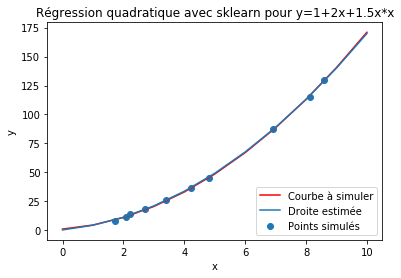

In [5]:
# Régression polynomiale quadratique pour des données simulées avec sklearn
# Transformation des données avec PolynomialFeatures

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def h_quadratique_univarie(theta,x):
    return theta[0]+theta[1]*x+theta[2]*x**2
def eqm(Y_estime,Y,m):
    return (((Y_estime-Y)**2).sum())*1/m

# Génération de données qui suivent une distribution quadratique univariée avec résidus ~ N(0,1)
m=10 # nombre de lignes de données
theta_simule = (1,2,1.5)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X = np.random.rand(m)*m # m valeurs de x entre 0 et m
Y = h_quadratique_univarie(theta_simule,X)+np.random.randn(m)*1.0 # Résidus N(0,1)
plt.scatter(X,Y,label = 'Points simulés') # Pour afficher les données aléatoires simulées

# Pour afficher la courbe du modèle simulé
X_modele = np.arange(0,m+1,1) 
Y_modele = h_quadratique_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele,'-r',label = 'Courbe à simuler')

# Génération des données quadratiques
from sklearn.preprocessing import PolynomialFeatures
transformateur_poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = transformateur_poly.fit_transform(X[:,np.newaxis])

from sklearn.linear_model import LinearRegression
modele = LinearRegression(fit_intercept=True)

X_quadratique = np.hstack((X.reshape(m,1),(X**2).reshape(m,1)))
modele.fit(X_poly,Y)
# Y_estime = modele.predict(np.hstack((X_modele.reshape(m+1,1),(X_modele**2).reshape(m+1,1))))
Y_estime = modele.predict(transformateur_poly.fit_transform(X_modele[:,np.newaxis]))
print("Theta0:", modele.intercept_)
print("Theta1:", modele.coef_[0])
print("Theta2:", modele.coef_[1])
plt.plot(X_modele,Y_estime,label='Droite estimée')

plt.title('Régression quadratique avec sklearn pour y=1+2x+1.5x*x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()